
# Scatter plot with histograms

Show the marginal distributions of a scatter plot as histograms at the sides of
the plot.

For a nice alignment of the main axes with the marginals, two options are shown
below:

While `.Axes.inset_axes` may be a bit more complex, it allows correct handling
of main axes with a fixed aspect ratio.

An alternative method to produce a similar figure using the ``axes_grid1``
toolkit is shown in the :doc:`/gallery/axes_grid1/scatter_hist_locatable_axes`
example.  Finally, it is also possible to position all axes in absolute
coordinates using `.Figure.add_axes` (not shown here).

Let us first define a function that takes x and y data as input, as well
as three axes, the main axes for the scatter, and two marginal axes. It will
then create the scatter and histograms inside the provided axes.


In [1]:
import numpy as np
import matplotlib.pyplot as plt

# Fixing random state for reproducibility
np.random.seed(19680801)

# some random data
x = np.random.randn(1000)
y = np.random.randn(1000)


def scatter_hist(x, y, ax, ax_histx, ax_histy):
    # no labels
    ax_histx.tick_params(axis="x", labelbottom=False)
    ax_histy.tick_params(axis="y", labelleft=False)

    # the scatter plot:
    ax.scatter(x, y)

    # now determine nice limits by hand:
    binwidth = 0.25
    xymax = max(np.max(np.abs(x)), np.max(np.abs(y)))
    lim = (int(xymax / binwidth) + 1) * binwidth

    bins = np.arange(-lim, lim + binwidth, binwidth)
    ax_histx.hist(x, bins=bins)
    ax_histy.hist(y, bins=bins, orientation="horizontal")

## Defining the axes positions using a gridspec

We define a gridspec with unequal width- and height-ratios to achieve desired
layout.  Also see the :doc:`/tutorials/intermediate/arranging_axes` tutorial.



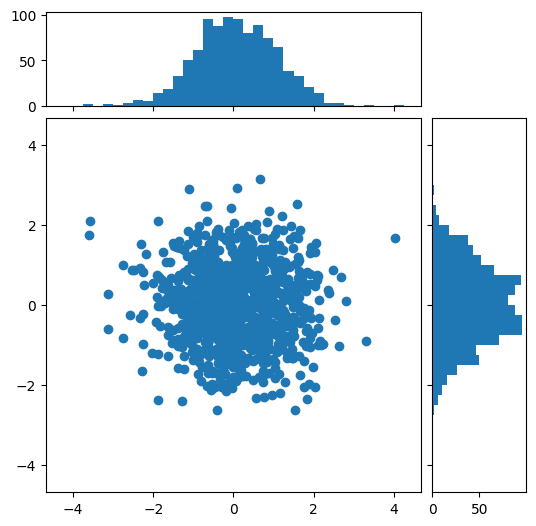

In [2]:
# Start with a square Figure.
fig = plt.figure(figsize=(6, 6))
# Add a gridspec with two rows and two columns and a ratio of 1 to 4 between
# the size of the marginal axes and the main axes in both directions.
# Also adjust the subplot parameters for a square plot.
gs = fig.add_gridspec(
    2,
    2,
    width_ratios=(4, 1),
    height_ratios=(1, 4),
    left=0.1,
    right=0.9,
    bottom=0.1,
    top=0.9,
    wspace=0.05,
    hspace=0.05,
)
# Create the Axes.
ax = fig.add_subplot(gs[1, 0])
ax_histx = fig.add_subplot(gs[0, 0], sharex=ax)
ax_histy = fig.add_subplot(gs[1, 1], sharey=ax)
# Draw the scatter plot and marginals.
scatter_hist(x, y, ax, ax_histx, ax_histy)

## Defining the axes positions using inset_axes

`~.Axes.inset_axes` can be used to position marginals *outside* the main
axes.  The advantage of doing so is that the aspect ratio of the main axes
can be fixed, and the marginals will always be drawn relative to the position
of the axes.



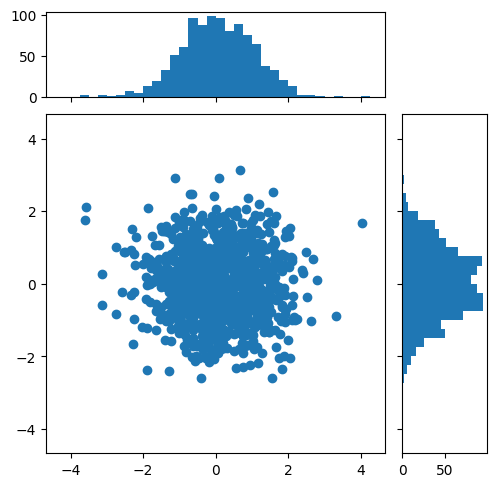

In [3]:
# Create a Figure, which doesn't have to be square.
fig = plt.figure(layout="constrained")
# Create the main axes, leaving 25% of the figure space at the top and on the
# right to position marginals.
ax = fig.add_gridspec(top=0.75, right=0.75).subplots()
# The main axes' aspect can be fixed.
ax.set(aspect=1)
# Create marginal axes, which have 25% of the size of the main axes.  Note that
# the inset axes are positioned *outside* (on the right and the top) of the
# main axes, by specifying axes coordinates greater than 1.  Axes coordinates
# less than 0 would likewise specify positions on the left and the bottom of
# the main axes.
ax_histx = ax.inset_axes([0, 1.05, 1, 0.25], sharex=ax)
ax_histy = ax.inset_axes([1.05, 0, 0.25, 1], sharey=ax)
# Draw the scatter plot and marginals.
scatter_hist(x, y, ax, ax_histx, ax_histy)

plt.show()

.. admonition:: References

   The use of the following functions, methods, classes and modules is shown
   in this example:

   - `matplotlib.figure.Figure.add_subplot`
   - `matplotlib.figure.Figure.add_gridspec`
   - `matplotlib.axes.Axes.inset_axes`
   - `matplotlib.axes.Axes.scatter`
   - `matplotlib.axes.Axes.hist`

